<a href="https://colab.research.google.com/github/vishal00200/Global_Terrorism_Analysis/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**First We will be extracting the hidden patterns in the data to get the information related to terrorist attacks. prior to that we will be performing data wrangling to make data more understandable and clear which will help in doing the proper analysis.**

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
GTD_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone projects/1 Exploratory Data Analysis/Global Terrorism Data.csv",encoding = "ISO-8859-1")
GTD_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
GTD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
GTD_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
GTD_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# **Performing Data wrangling Operations to clean null values and renaming columns in understandable format**

In [ ]:
# Checking columns with a very high count of null values as compared to the total records
cols = GTD_data.isna().sum()
cols_df = cols.to_frame()
cols_df.rename(columns = {0:'Null values count'},inplace = True)
high_nullvalues_count = cols_df[cols_df['Null values count']>100000]
high_nullvalues_count

,Null values count
approxdate,172452
resolution,179471
location,126196
alternative,152680
alternative_txt,152680
...,...
nreleased,171291
addnotes,153402
scite2,104758
scite3,138175


In [ ]:
GTDcopy = GTD_data.copy()
GTD_data.drop_duplicates(keep = False,inplace = True)

In [ ]:
high_nullvalues_count['variables'] = high_nullvalues_count.index
high_nullvalues_count.reset_index(inplace = True,drop = True)
high_nullvalues_count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Null values count,variables
0,172452,approxdate
1,179471,resolution
2,126196,location
3,152680,alternative
4,152680,alternative_txt
...,...,...
72,171291,nreleased
73,153402,addnotes
74,104758,scite2
75,138175,scite3


In [ ]:
# Dropping columns having a large number of missing values
GTD_data.drop(columns = list(high_nullvalues_count['variables']),inplace = True)

In [ ]:
# Dropping the columns which are not required
cols = ['eventid','country','region','iday','specificity','vicinity','summary','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','weapsubtype1','weapdetail','scite1','dbsource','latitude','longitude']
GTD_data.drop(columns = cols,axis = 1,inplace = True)

In [ ]:
# Number of columns left after dropping columns in previous steps
GTD_data.shape

(181691, 40)

In [ ]:
GTD_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   extended          181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region_txt        181691 non-null  object 
 5   provstate         181270 non-null  object 
 6   city              181257 non-null  object 
 7   crit1             181691 non-null  int64  
 8   crit2             181691 non-null  int64  
 9   crit3             181691 non-null  int64  
 10  doubtterr         181690 non-null  float64
 11  multiple          181690 non-null  float64
 12  success           181691 non-null  int64  
 13  suicide           181691 non-null  int64  
 14  attacktype1_txt   181691 non-null  object 
 15  targtype1_txt     181691 non-null  object 
 16  targsubtype1_txt  17

In [ ]:
# checking for remaining null values
rem_nulls = GTD_data.isna().sum().to_frame()
rem_nulls.rename(columns = {0:'Null values count'},inplace = True)
rem_nulls = rem_nulls[rem_nulls['Null values count'] != 0]
rem_nulls

,Null values count
provstate,421
city,434
doubtterr,1
multiple,1
targsubtype1_txt,10373
corp1,42550
target1,636
natlty1_txt,1559
guncertain1,380
nperps,71115


In [ ]:
# dropping all rows that have null values
GTD_data.dropna(subset=['provstate','city','doubtterr','multiple','target1','guncertain1','ishostkid'],inplace=True)



In [ ]:
# On checking the invalid values for nperps and npercap variable we found out that -99 is the value assigned for unknowns so we will be replacing the null values with -99
# in further steps 
GTD_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179670 entries, 1 to 181690
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             179670 non-null  int64  
 1   imonth            179670 non-null  int64  
 2   extended          179670 non-null  int64  
 3   country_txt       179670 non-null  object 
 4   region_txt        179670 non-null  object 
 5   provstate         179670 non-null  object 
 6   city              179670 non-null  object 
 7   crit1             179670 non-null  int64  
 8   crit2             179670 non-null  int64  
 9   crit3             179670 non-null  int64  
 10  doubtterr         179670 non-null  float64
 11  multiple          179670 non-null  float64
 12  success           179670 non-null  int64  
 13  suicide           179670 non-null  int64  
 14  attacktype1_txt   179670 non-null  object 
 15  targtype1_txt     179670 non-null  object 
 16  targsubtype1_txt  16

In [ ]:
GTD_data['targsubtype1_txt'].fillna("Unknown",inplace=True)
GTD_data['corp1'].fillna("Unknown",inplace=True)
GTD_data['natlty1_txt'].fillna("Unknown",inplace=True)
GTD_data['nperps'].fillna(-99,inplace=True) # unknown values for this column are assigned as -99, so replacing null values with -99
GTD_data['nperpcap'].fillna(-99,inplace=True) # unknown values for this column are assigned as -99, so replacing null values with -99
GTD_data['claimed'].fillna(0,inplace=True) # We are assuming null values to be equal to 0 which indicates nobody took responsibility of the incident
GTD_data['weapsubtype1_txt'].fillna("Unknown",inplace=True)
GTD_data['nkill'].fillna(-1,inplace=True) # Putting negative value in place of not null so that nkill doesnot gets counted in either side 
GTD_data['nkillus'].fillna(-1,inplace=True)
GTD_data['nkillter'].fillna(-1,inplace=True)
GTD_data['nwound'].fillna(-1,inplace=True)
GTD_data['nwoundus'].fillna(-1,inplace=True)
GTD_data['nwoundte'].fillna(-1,inplace=True)

In [ ]:
# Final data with no null values
GTD_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179670 entries, 1 to 181690
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             179670 non-null  int64  
 1   imonth            179670 non-null  int64  
 2   extended          179670 non-null  int64  
 3   country_txt       179670 non-null  object 
 4   region_txt        179670 non-null  object 
 5   provstate         179670 non-null  object 
 6   city              179670 non-null  object 
 7   crit1             179670 non-null  int64  
 8   crit2             179670 non-null  int64  
 9   crit3             179670 non-null  int64  
 10  doubtterr         179670 non-null  float64
 11  multiple          179670 non-null  float64
 12  success           179670 non-null  int64  
 13  suicide           179670 non-null  int64  
 14  attacktype1_txt   179670 non-null  object 
 15  targtype1_txt     179670 non-null  object 
 16  targsubtype1_txt  17

# **Final Data after performing Data wrangling**

In [ ]:
# Renaming columns with more explainable name

GTD_data.rename(columns={"iyear":"Year of Attack","imonth":"Month of Attack","extended":"Extended Incident","country_txt":"Country","region_txt":"Region","provstate":"national Region",
                         "doubtterr":"Unsure terrorism Incident","multiple":"Multiple Incident","success":"Successful Attack","suicide":"Suicide Attack","attacktype1_txt":"Attack Type",
                         "targtype1_txt":"Target type", "targsubtype1_txt":"Target subtype","corp1":"Targeted Entity","target1":"Specific target/victim","natlty1_txt":"Target/Victim Nationality",
                         "gname":"Perpetrator Group","guncertain1":"unconfirmed perpetrator group","individual":"Individual perpetrator","nperps":"Number of perpetrators","nperpcap":"captured perpetrators",
                         "claimed":"Responsibility claimed","weaptype1_txt":"Weapon Type","weapsubtype1_txt":"Weapon Sub Type","nkill":"Fatalities count","nkillus":"Fatalities Count (US)",
                         "nkillter":"Number of Perpetrator Fatalities","nwound":"Injured victims","nwoundus":"Injured victims(US)","nwoundte":"Injured Perpetrators",
                         "property":"Property Damaged","ishostkid":"Hostages/kidnapped Victims","INT_LOG":"International Logistical Attack","INT_IDEO":"International Ideological Attack",
                         "INT_MISC":"International Miscellaneous Attack","INT_ANY":"International Attack","crit1":"Political/Social/Religious/social Goal",
                         "crit2":"Coerced/Intimidating/Publicize to larger audience Goal","crit3":"Outside Iternational Humantarian Law"},inplace=True)

In [ ]:
GTD_data.head()

,Year of Attack,Month of Attack,Extended Incident,Country,Region,national Region,city,Political/Social/Religious/social Goal,Coerced/Intimidating/Publicize to larger audience Goal,Outside Iternational Humantarian Law,...,Number of Perpetrator Fatalities,Injured victims,Injured victims(US),Injured Perpetrators,Property Damaged,Hostages/kidnapped Victims,International Logistical Attack,International Ideological Attack,International Miscellaneous Attack,International Attack
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,...,-1.0,0.0,-1.0,-1.0,0,1.0,0,1,1,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,...,-1.0,0.0,-1.0,-1.0,0,0.0,-9,-9,1,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,1,1,...,-1.0,-1.0,-1.0,-1.0,1,0.0,-9,-9,1,1
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,1,1,...,-1.0,-1.0,-1.0,-1.0,1,0.0,-9,-9,1,1
5,1970,1,0,United States,North America,Illinois,Cairo,1,1,1,...,0.0,0.0,0.0,0.0,1,0.0,-9,-9,0,-9


# **Exploration and visualization of the data**

In [ ]:
GTD_data1 = GTD_data[GTD_data['Unsure terrorism Incident'] == 0]

In [ ]:
GTD_data1.head()

,Year of Attack,Month of Attack,Extended Incident,Country,Region,national Region,city,Political/Social/Religious/social Goal,Coerced/Intimidating/Publicize to larger audience Goal,Outside Iternational Humantarian Law,...,Number of Perpetrator Fatalities,Injured victims,Injured victims(US),Injured Perpetrators,Property Damaged,Hostages/kidnapped Victims,International Logistical Attack,International Ideological Attack,International Miscellaneous Attack,International Attack
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,...,-1.0,0.0,-1.0,-1.0,0,1.0,0,1,1,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,...,-1.0,0.0,-1.0,-1.0,0,0.0,-9,-9,1,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,1,1,...,-1.0,-1.0,-1.0,-1.0,1,0.0,-9,-9,1,1
5,1970,1,0,United States,North America,Illinois,Cairo,1,1,1,...,0.0,0.0,0.0,0.0,1,0.0,-9,-9,0,-9
6,1970,1,0,Uruguay,South America,Montevideo,Montevideo,1,1,1,...,-1.0,0.0,-1.0,-1.0,0,0.0,0,0,0,0


Text(0.5, 1.0, 'Overall Terrorist Attacks')

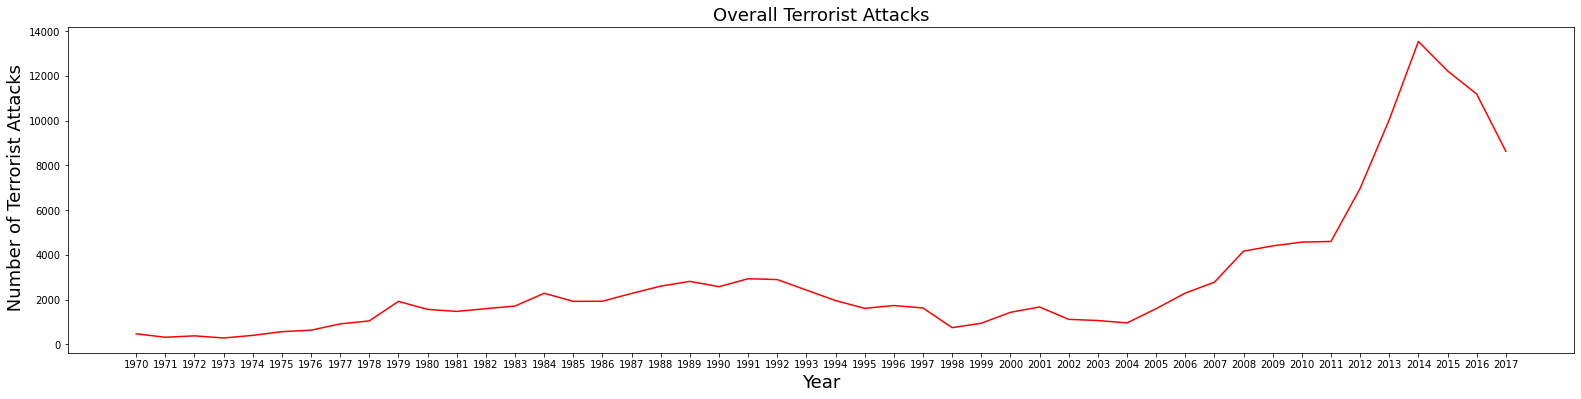

In [ ]:
# Line chart showing Year wise fluctations of Fatalities occurred during Terrorist attacks 
fatalties = GTD_data1.groupby('Year of Attack')["Fatalities count"].count()
plt.figure(figsize=(27,6))
plt.plot(fatalties,color='red')
plt.xticks(np.arange(1970,2018,1))
plt.xlabel("Year",fontsize=18)
plt.ylabel(" Number of Terrorist Attacks",fontsize=18)
plt.title("Overall Terrorist Attacks",fontsize=18)

Text(0.5, 1.0, 'Overall Terrorist Attacks')

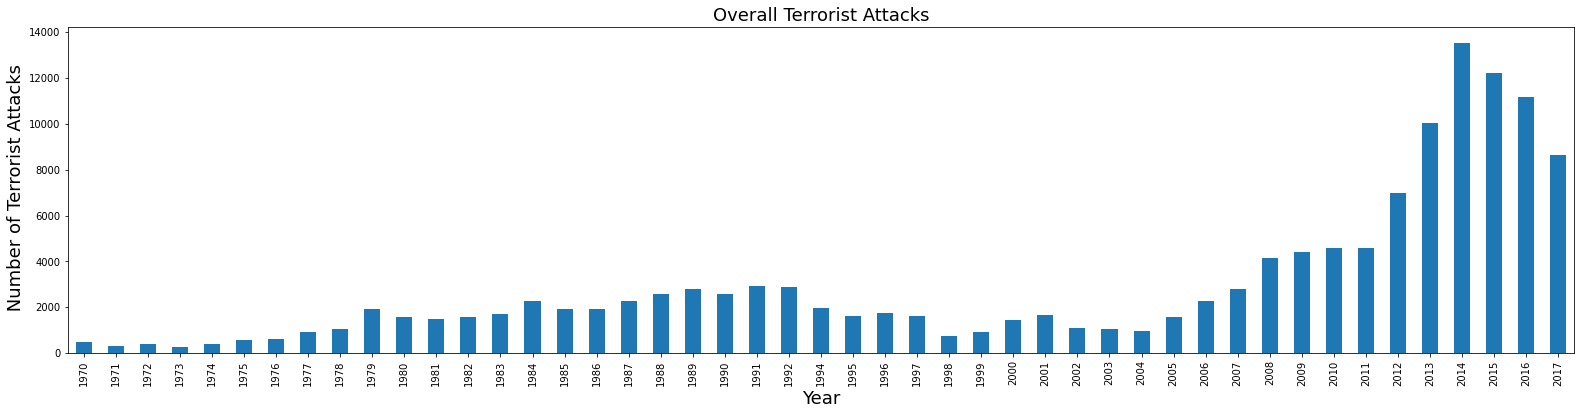

In [ ]:
# Bar chart showing Year wise fluctations of Fatalities occurred during Terrorist attacks 
plt.figure(figsize=(27,6))
GTD_data1.groupby('Year of Attack')["Fatalities count"].count().plot(kind='bar')
plt.xlabel("Year",fontsize=18)
plt.ylabel(" Number of Terrorist Attacks",fontsize=18)
plt.title("Overall Terrorist Attacks",fontsize=18)

***The year with highest number of confirmed/sure terrorist attacks was 2014.There was a sudden rise in terrorist attacks after 2011, it kept on increasing after 2011 and after 2014 again started declining due to change in goverment and Improved Security***

Text(0, 0.5, 'Region')

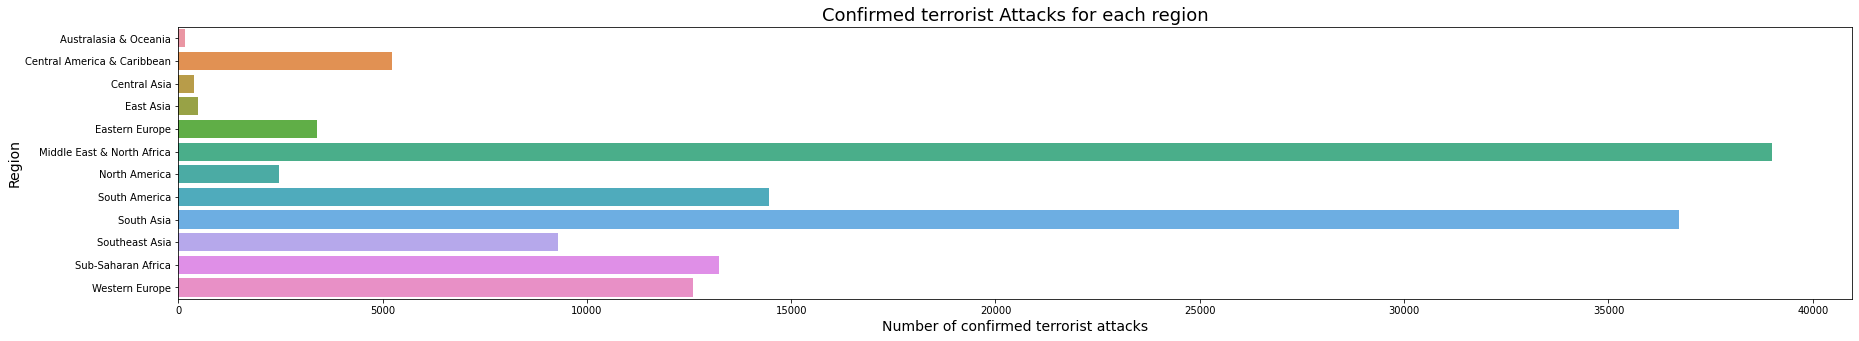

In [ ]:
# Plotting the count of overall confirmed terrorist attacks for each region for sure terrorist attacks

output_data = GTD_data1.groupby('Region')['Region'].count().to_frame()
l1 =[]
fig, ax = plt.subplots(figsize=(30, 5))
for i in range(0,12):
  l1.append(output_data['Region'][i])
sns.barplot(x=l1,y=output_data.index,ax=ax)
plt.xlabel("Number of confirmed terrorist attacks",fontsize = 14)
plt.title("Confirmed terrorist Attacks for each region",fontsize = 18)
plt.ylabel("Region",fontsize = 14)

***Middle East and North Africa region has the highest number of confirmed terrorist attacks.Central Asia has lowest number of confirmed terrorist attacks***

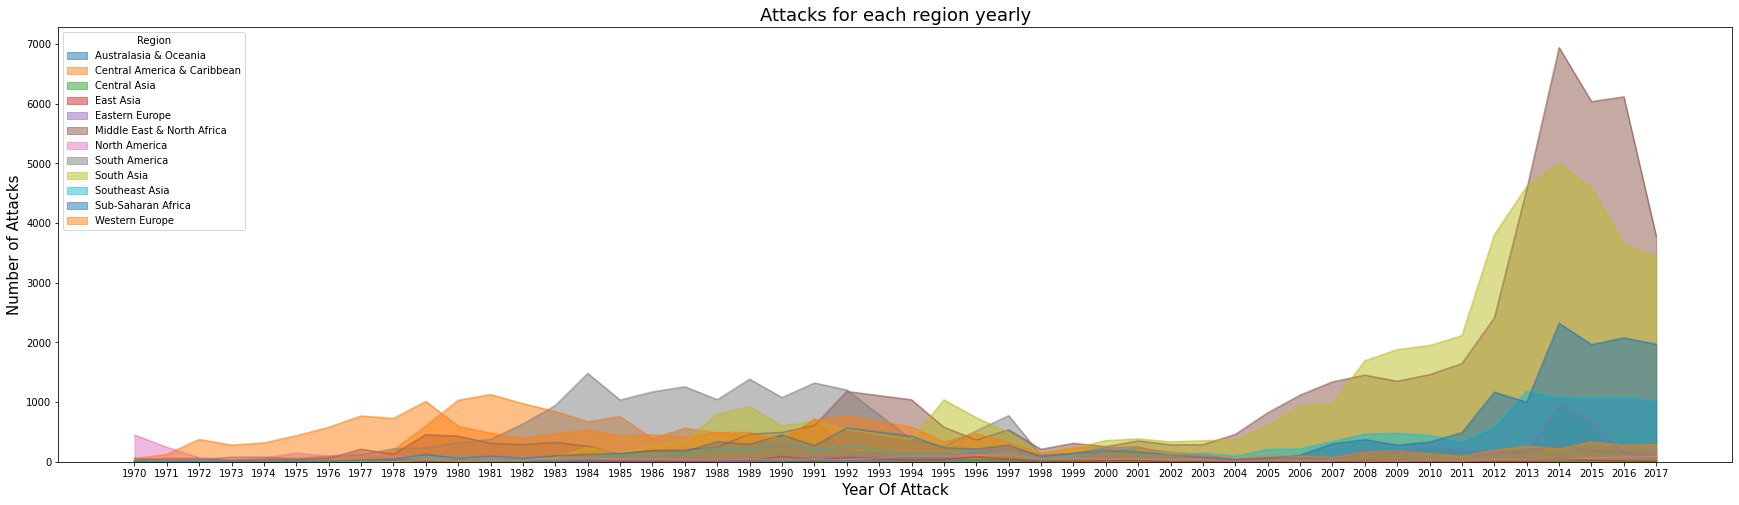

In [ ]:
# Plotting the count of overall increasing terror attacks for each year region wise
pd.crosstab(GTD_data['Year of Attack'],GTD_data['Region']).plot(kind='area',stacked = False,figsize = (30,8))
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(np.arange(1970,2018,1))
plt.title("Attacks for each region yearly",fontsize=18)
plt.xlabel("Year Of Attack",fontsize=15)
plt.show()

***As years increased number of attacks increased and Attacks in Middle east and North Africa are maximum in year 2014*** 

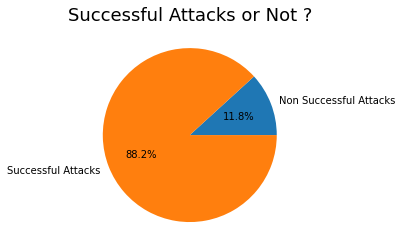

In [ ]:
# Checking for terrorrist attacks that were successful using Pie chart
output_data = GTD_data1.groupby('Successful Attack')['Successful Attack'].count().to_frame()
my_labels = ["Non Successful Attacks ","Successful Attacks"] 
plt.pie(output_data['Successful Attack'],labels=my_labels,autopct='%.1f%%')
plt.title("Successful Attacks or Not ?",fontsize = 18)
plt.show()

***88.2 % were successful attacks and 11.8 % were unsuccessful attacks***

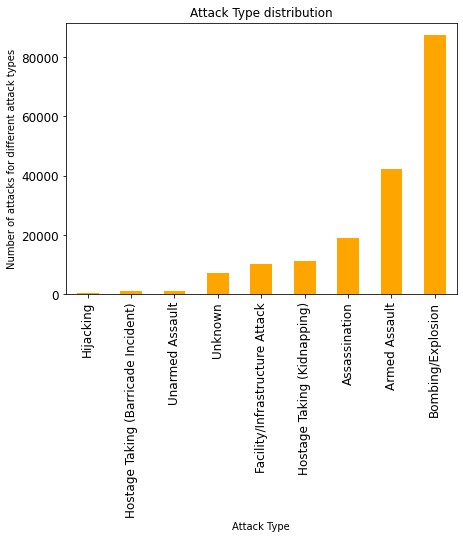

In [ ]:
# Checking the number of attacks for each attack type category
output_data = GTD_data.groupby('Attack Type')['Attack Type'].count().sort_values().plot.bar(ylabel="Number of attacks for different attack types",figsize=(7,5),title="Attack Type distribution",fontsize=12,color="orange")

***Overall attacks were maximum for Bombing/explosion attack***

In [ ]:
def attacks_graph(num):
  output_data = GTD_data.groupby(['Year of Attack','Attack Type'])['Attack Type'].count().to_frame()
  output_data.index = output_data.index.set_names(['Year_of_Attack', 'Attack_Type'])
  output_data.reset_index(inplace=True)
  output_data = output_data[(output_data['Year_of_Attack']) == num]
  output_data.rename(columns = {'Attack Type':'Number of attacks'},inplace= True)
  plt.subplots(figsize=(10, 6))
  sns.barplot(x=output_data['Year_of_Attack'],y=output_data['Number of attacks'],palette = "magma",hue=output_data['Attack_Type']).set(title="Attack type for year:"+str(num))


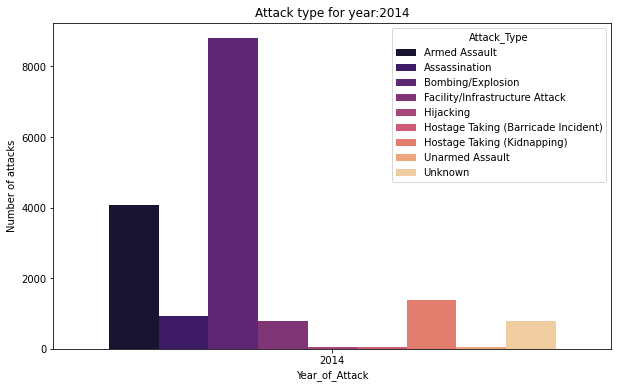

In [ ]:
attacks_graph(2014)

***As per Above For year 2014, maximum attacks are of Bombing/explosion type followed by armed assault attack type***

In [ ]:
# Combining confirmed data for prepetrator groups according to the number of attacks done considering date for which perpetrator groups are confirmed
# Considering perpetartor groups which were responsible for maximum number of attacks (more than 1500)

GTDdata = GTD_data1[GTD_data['unconfirmed perpetrator group'] == 0]
perpetrator_groups = GTDdata.groupby('Perpetrator Group')['Perpetrator Group'].count().to_frame()
perpetrator_groups = perpetrator_groups[perpetrator_groups['Perpetrator Group'] > 1500 ]
perpetrator_groups.index= perpetrator_groups.index.set_names(['perpetrator groups'])
perpetrator_groups.reset_index(inplace=True)
perpetrator_groups.rename(columns={'Perpetrator Group':'Number of attacks by perpetrator group'},inplace=True)
perpetrator_groups

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,perpetrator groups,Number of attacks by perpetrator group
0,Al-Shabaab,1509
1,Basque Fatherland and Freedom (ETA),1589
2,Boko Haram,1579
3,Farabundo Marti National Liberation Front (FMLN),2115
4,Irish Republican Army (IRA),1780
5,Islamic State of Iraq and the Levant (ISIL),4115
6,New People's Army (NPA),1505
7,Shining Path (SL),3823
8,Taliban,5260
9,Unknown,61030


[Text(0.5, 1.0, 'Number of attacks group wise')]

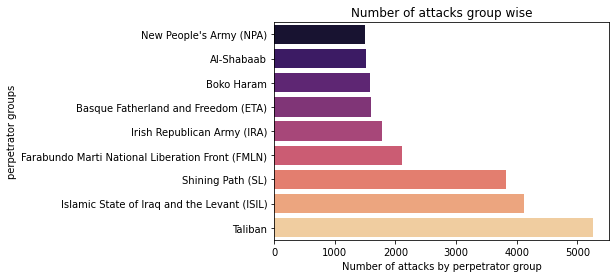

In [ ]:
# Removing records for unknown perpetrator groups and plotting graph for rest perpetrator groups

perpetrator_groups = perpetrator_groups[perpetrator_groups['perpetrator groups']!= "Unknown"]
perpetrator_groups = perpetrator_groups.sort_values(by=['Number of attacks by perpetrator group'])
sns.barplot(x=perpetrator_groups['Number of attacks by perpetrator group'],y=perpetrator_groups['perpetrator groups'],palette = "magma",dodge=False).set(title="Number of attacks group wise")

***Taliban is responsible for maximum number of attacks followed by ISIL***

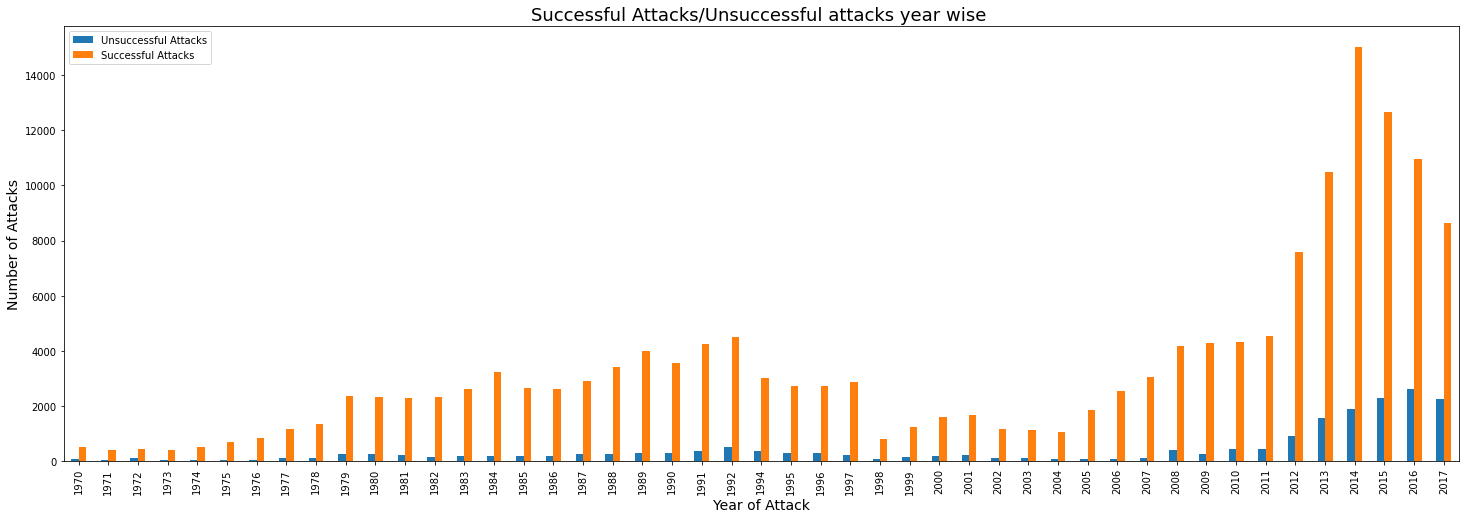

In [ ]:
# Checking successful and unsuccessful attacks yearly
pd.crosstab(GTD_data['Year of Attack'],GTD_data['Successful Attack']).plot(kind = 'bar',stacked = False,figsize = (25,8))
plt.xlabel("Year of Attack",fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.title("Successful Attacks/Unsuccessful attacks year wise ",fontsize= 18)
plt.legend(['Unsuccessful Attacks', 'Successful Attacks'])

***Very less attacks were unsuccessful and most attacks were successfull in year 2014***


---




In [ ]:
# Function created to do Grouping of data based on column name provided

def grouped_data(col,df):
  GTD_data_unsure = df[df['Unsure terrorism Incident'] == 0]
  count_of_attacks = GTD_data_unsure.groupby(col)[col].count()
  return count_of_attacks

In [ ]:

output_data = grouped_data('Target/Victim Nationality',GTD_data).to_frame()
output_data.index = output_data.index.set_names(['Victim Nationality'])
output_data.reset_index(inplace=True)
output_data.rename(columns={'Target/Victim Nationality':'count of attacks'},inplace=True)
output_data = output_data[output_data['count of attacks']> 3000]
output_data

,Victim Nationality,count of attacks
0,Afghanistan,9469
35,Colombia,5739
79,India,9878
83,Iraq,21325
132,Nigeria,3384
138,Pakistan,11365
143,Peru,4914
144,Philippines,4878
189,Turkey,3026
194,United States,3365


In [ ]:
x = ['Afghanistan','Colombia','India','Iraq','Nigeria','Pakistan','Peru','Philippines','Turkey','United States']
GTD_data_selected = GTD_data[[t in x for t in GTD_data['Target/Victim Nationality']]]
output_data = GTD_data_selected.groupby(['Target/Victim Nationality','Successful Attack'])['Successful Attack'].count().to_frame()
output_data.index = output_data.index.set_names(['Victim Nationality', 'Successful/Unsuccessful attack'])
output_data.reset_index(inplace=True)
output_data.rename(columns = {'Successful Attack':'Number of attacks'},inplace= True)
output_data

,Victim Nationality,Successful/Unsuccessful attack,Number of attacks
0,Afghanistan,0,1112
1,Afghanistan,1,9677
2,Colombia,0,563
3,Colombia,1,7346
4,India,0,1689
5,India,1,10375
6,Iraq,0,2751
7,Iraq,1,21307
8,Nigeria,0,309
9,Nigeria,1,3445


Text(0.5, 1.0, 'Nationality of Top Targeted Victims')

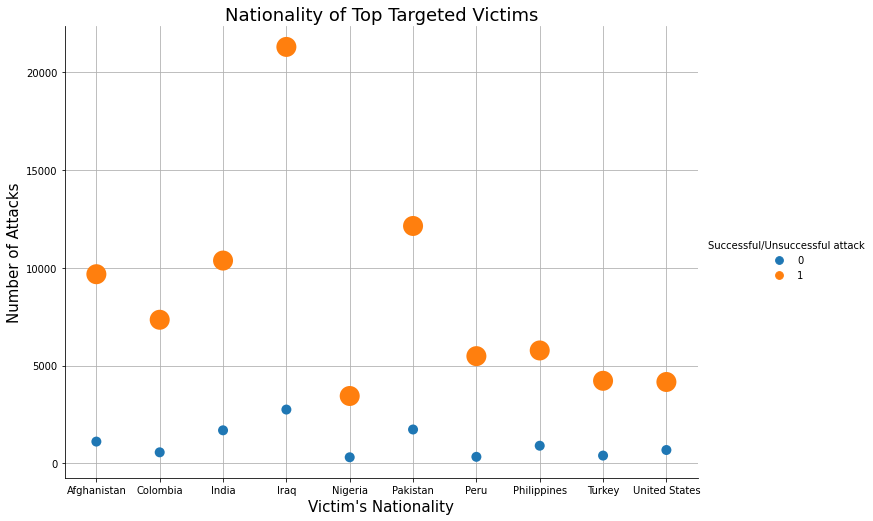

In [ ]:
# 0 represents unsusccesful attacks and 1 represents successful attacks in the graph

sns.catplot(x="Victim Nationality", y="Number of attacks", kind="swarm",height=7,hue = "Successful/Unsuccessful attack",sizes=(100, 400),aspect=10/7, data=output_data)
plt.grid()
plt.xlabel("Victim's Nationality",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.title("Nationality of Top Targeted Victims",fontsize=18)

***Iraq faced high number of successful attacks followed by Pakistan and India***


In [ ]:
# Fatalities count for different region

GTD_data_selected = GTD_data[GTD_data['Fatalities count']>0]
GTD_data_selected = GTD_data_selected.groupby(['Region'])['Fatalities count'].sum().to_frame()
GTD_data_selected.reset_index(inplace = True)

[Text(0.5, 1.0, 'Fatalities count of perpetrators and victims combined')]

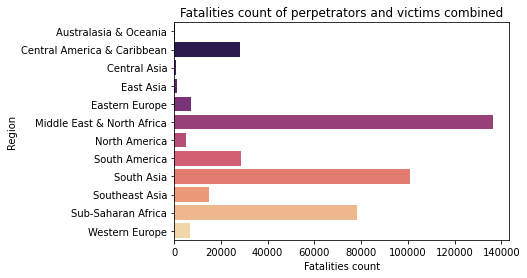

In [ ]:
# Plotting graph for fatalaties count,injured victims and injured perpetarators count region wise
sns.barplot(y=GTD_data_selected['Region'],x=GTD_data_selected['Fatalities count'],palette = "magma",dodge=False).set(title="Fatalities count of perpetrators and victims combined")

***Middle East and North Africa region had maximum number of fatalaties followed by South Asia***

In [ ]:
#hi